<a href="https://colab.research.google.com/github/chien2734/sgu_data_analyst/blob/an/pima_indians_diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHÂN TÍCH BỆNH TIỂU ĐƯỜNG

## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
  + Đây là một bài toán y tế dự đoán nguy cơ tiểu đường type 2.
  + Đối tượng nghiên cứu: phụ nữ Pima Indian độ tuổi > 21 (Arizona, Mỹ).
  + Bài toán được thiết kế như một bài toán phân loại nhị phân (binary classification).
  + Mục tiêu: Dựa vào thông tin nhân khẩu học  và y sinh học để dự đoán liệu bệnh nhân có mắc tiểu đường trong vòng 5 năm hay không.
- **Dữ liệu đầu vào**:
  + Pregnancies → Số lần mang thai.
  + Glucose → Nồng độ glucose huyết tương sau 2h (OGTT test).
  + BloodPressure → Huyết áp tâm trương (mmHg).
  + SkinThickness → Độ dày nếp gấp da cánh tay (mm).
  + Insulin → Nồng độ insulin huyết thanh sau 2h (µU/ml).
  + BMI → Chỉ số khối cơ thể (cân nặng/chiều cao²).
  + DiabetesPedigreeFunction (DPF) → Hàm di truyền về tiền sử gia đình mắc tiểu đường.
  + Age → Tuổi (năm).
- **Kết quả**:
  + Class (0 hoặc 1):
    + 0 = Không mắc tiểu đường.
    + 1 = Mắc tiểu đường (theo tiêu chuẩn WHO: Glucose ≥ 200 mg/dl sau 2h OGTT).
  

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [84]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
import math

%matplotlib inline
warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [ ]:
column_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

df = pd.read_csv("pima-indians-diabetes.csv", names = column_names)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
- Số dòng, số cột của dữ liệu
- Kiểu dữ liệu của từng cột
- 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
- Thông tin chung về dữ liệu

In [ ]:
# 1. Thông tin kích thước dữ liệu
print(f"- Số dòng và số cột: {df.shape} \n")

# 2. Kiểu dữ liệu của từng cột
print(f"- Kiểu dữ liệu của từng cột: {df.dtypes} \n")

# 3. Hiển thị 5 dòng đầu và 5 dòng cuối
print(f"-  5 dòng đầu tiên và 5 dòng cuối cùng: ")
display(df.head())
display(df.tail())

# 4. Thông tin chung về dữ liệu
print(f"\n- Thông tin tổng quan về dữ liệu: ")
df.info

- Số dòng và số cột: (768, 9) 

- Kiểu dữ liệu của từng cột: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 

-  5 dòng đầu tiên và 5 dòng cuối cùng: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



- Thông tin tổng quan về dữ liệu: 


<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

**Nhận xét**:
- Dữ liệu có 768 dòng, 9 cột, toàn bộ ở dạng số nên thuận tiện cho xử lý.
- Biến Outcome là nhị phân, thể hiện tình trạng bệnh, phân phối có thể hơi lệch nhưng cần phân tích thêm.
- Các cột dữ liệu hầu hết là kiểu int64, chỉ có BMI và DiabetesPedigreeFunction ở dạng float64.
- Quan sát nhanh ở 5 dòng đầu và cuối cho thấy tồn tại nhiều giá trị 0 bất thường ở các cột sinh học (Glucose, Insulin, SkinThickness).

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
# === 1. Kiểm tra dữ liệu trùng lặp ===
duplicates = df[df.duplicated()]
print("Số dòng trùng lặp:", duplicates.shape[0])
if not duplicates.empty:
    print("\nCác dòng trùng lặp:")
    display(duplicates)

# === 2. Kiểm tra giá trị Null ===
null_values = df[df.isnull().any(axis=1)]
print("\nSố dòng chứa giá trị Null:", null_values.shape[0])
if not null_values.empty:
    print("\nCác dòng có Null values:")
    display(null_values)

# === 3. Kiểm tra giá trị NaN ===
nan_values = df[df.isna().any(axis=1)]
print("\nSố dòng chứa giá trị NaN:", nan_values.shape[0])
if not nan_values.empty:
    print("\nCác dòng có NaN values:")
    display(nan_values)


Số dòng trùng lặp: 0

Số dòng chứa giá trị Null: 0

Số dòng chứa giá trị NaN: 0


**Nhận xét**:
- Dữ liệu không có dòng bị trùng lặp
- Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
- Count, Mean, Standard Deviation, Minimum Value
- 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [ ]:
description = df.describe()
display(description)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Nhận xét**:
- Các biến Pregnancies, DPF, Age, Outcome có giá trị hợp lý.
- Các biến Glucose, BloodPressure, SkinThickness, Insulin, BMI xuất hiện giá trị 0 bất hợp lý (không phản ánh thực tế y sinh học).
- Đặc biệt, SkinThickness và Insulin có rất nhiều giá trị bằng 0, làm méo phân phối (median và 25% đều = 0).
- Các biến khác có phân phối hợp lý, giá trị trung bình và trung vị gần nhau.

####(4) Hiển thị số lượng giá trị bằng không trên mỗi cột

---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zero values in %---
% of rows with zero values in all listed columns: 30.73%
% of rows with zero values in Glucose, BloodPressure, BMI: 5.73%


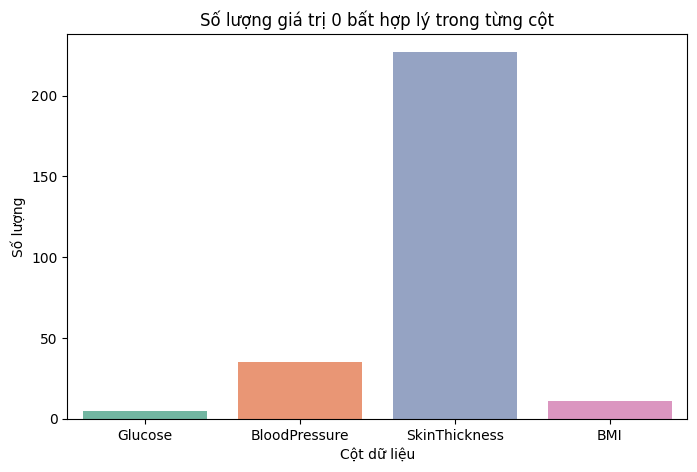

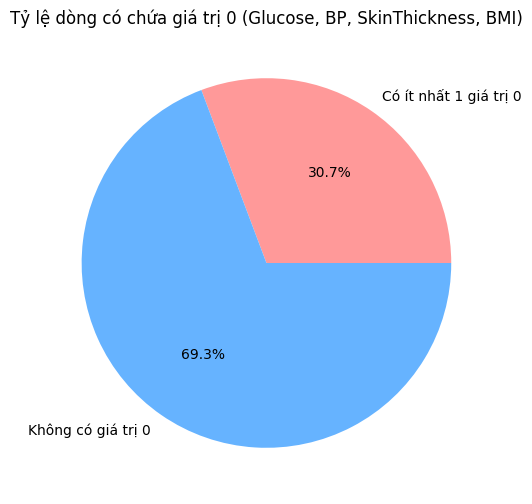

In [ ]:
# --- Count zero values per column ---
print("---Count zero values per column---")
zero_counts = {}
for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI"]:
    zero_counts[col] = (df[col] == 0).sum()
    print(f"{col}: {zero_counts[col]}")

# Convert to DataFrame for visualization
zero_df = pd.DataFrame(list(zero_counts.items()), columns=["Column", "Zero Count"])

# --- Percentage of rows with zero values ---
print("\n---Rows with zero values in %---")
all_cols_pct = (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
                 (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) * 100

gbm_cols_pct = (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
                   (df["BMI"]==0)].shape[0] / df.shape[0]) * 100

print("% of rows with zero values in all listed columns: {:.2f}%".format(all_cols_pct))
print("% of rows with zero values in Glucose, BloodPressure, BMI: {:.2f}%".format(gbm_cols_pct))

# --- Visualization: Bar chart of zero counts ---
plt.figure(figsize=(8,5))
sns.barplot(x="Column", y="Zero Count", data=zero_df, palette="Set2")
plt.title("Số lượng giá trị 0 bất hợp lý trong từng cột")
plt.ylabel("Số lượng")
plt.xlabel("Cột dữ liệu")
plt.show()

# --- Visualization: Pie chart for percentage of rows with zero values ---
plt.figure(figsize=(6,6))
plt.pie([all_cols_pct, 100-all_cols_pct],
        labels=["Có ít nhất 1 giá trị 0", "Không có giá trị 0"],
        autopct='%1.1f%%',
        colors=["#ff9999","#66b3ff"])
plt.title("Tỷ lệ dòng có chứa giá trị 0 (Glucose, BP, SkinThickness, BMI)")
plt.show()


**Nhận xét**:
- Có thể loại bỏ các hàng có giá trị bằng 0 trong các cột Glucose, BloodPressure hoặc BMI vì những hàng này chỉ chiếm khoảng 6% dữ liệu.
- Có thể gán giá trị cho Độ dày da (SkinThickness) vì chúng chiểm tới 30% dữ liệu.

#### (5) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)

In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


**Nhận xét** :
- Lớp Outcome = 0 (không mắc tiểu đường) có 500 mẫu, chiếm khoảng 65% dữ liệu.
- Lớp Outcome = 1 (mắc tiểu đường) có 268 mẫu, chiếm khoảng 35% dữ liệu.
- Như vậy dữ liệu không cân bằng tuyệt đối nhưng cũng không quá mất cân bằng nghiêm trọng (65% vs 35%).

#### (6) Mối tương quan giữa các tính chất (Correlations)

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:

- Glucose có tương quan cao nhất với Outcome (0.467) → nồng độ glucose máu là yếu tố quan trọng nhất trong việc phân loại tiểu đường.
- BMI (0.293), Age (0.238) và Pregnancies (0.222) cũng có mức tương quan đáng kể → những yếu tố nhân khẩu và thể chất cũng góp phần vào nguy cơ mắc bệnh.
- DiabetesPedigreeFunction có tương quan trung bình (0.174) → tiền sử gia đình cũng liên quan nhưng yếu hơn.
- Insulin (0.131), SkinThickness (0.075) và BloodPressure (0.065) có tương quan thấp với Outcome → ít ảnh hưởng trong dự đoán theo mối quan hệ tuyến tính.
- Không có biến nào có tương quan âm mạnh → tất cả các đặc trưng đều cùng chiều với nguy cơ tiểu đường.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị mối tương quan giữa các biến (Correlation Heatmap)

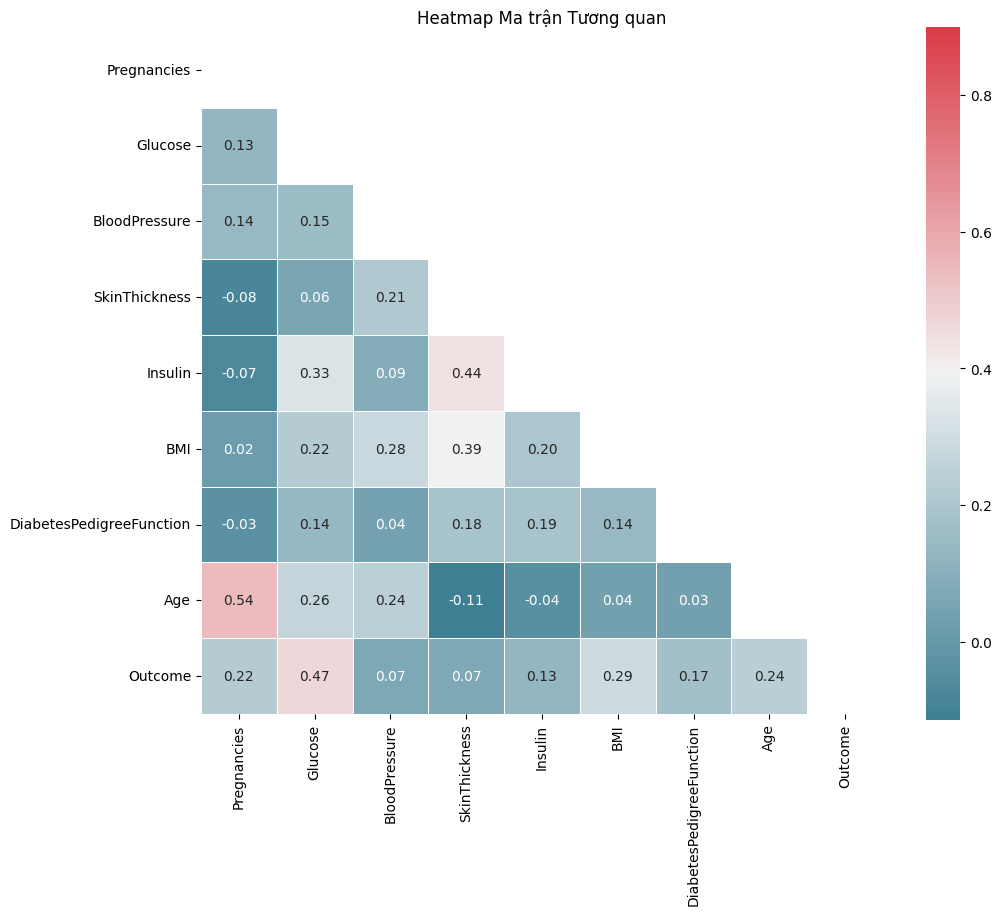

In [ ]:
# Chỉ lấy các cột numeric
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Tính ma trận tương quan
corr = numeric_df.corr()

# Tạo mask cho tam giác trên
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Vẽ heatmap
plt.figure(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title("Heatmap Ma trận Tương quan")
plt.show()

**Nhận xét**:
- Glucose có tương quan mạnh nhất với biến mục tiêu Outcome (~0.47) → xác nhận nồng độ đường huyết là yếu tố dự báo quan trọng nhất.
- BMI (0.29), Age (0.24) và Pregnancies (0.22) cũng có mức tương quan đáng kể với Outcome → những yếu tố nhân khẩu học và thể chất cũng ảnh hưởng.
- DiabetesPedigreeFunction (0.17) có mối quan hệ vừa phải, cho thấy yếu tố di truyền vẫn có vai trò nhưng không mạnh.
- Trong khi đó,Insulin (0.13) BloodPressure (0.07) và SkinThickness (~0.07) có tương quan rất thấp với Outcome → ít ảnh hưởng trong mối quan hệ tuyến tính, có thể bị che mờ do nhiều giá trị thiếu (0 bất hợp lý).

#### (2) Phân tích mối quan hệ giữa các biến và Outcome (Bivariate Analysis)

Xem xét kỹ hơn mối quan hệ giữa Outcome và các yếu tố khác bằng biểu đồ histogram. Biểu đồ histogram đầu tiên thể hiện khi Outcome = 0 khi người đó không bệnh tiểu đường, trong khi biểu đồ histogram còn lại biểu thị Outcome = 1 nghĩa là người đó bệnh tiểu đường.

In [ ]:

"""
Vẽ histogram của một cột theo Outcome (0 = không bệnh, 1 = bệnh).

Args:
    df: DataFrame
    column: tên cột cần vẽ
    bins: số bins cho histogram (default = 20)
"""
def plot_hist_by_outcome(df, column, bins=20):
    plt.figure(figsize=(10,6))
    print(f"-------------------Outcome vs {column}-------------------\n")
    # Histogram cho Outcome = 0
    plt.subplot(2,1,1)
    plt.hist(df[df["Outcome"]==0][column], bins=bins, color="skyblue", edgecolor="black")
    plt.title(f"Phân phối {column} (Outcome = 0 - Không bệnh)")
    plt.xlabel(column)
    plt.ylabel("Số lượng")

    # Histogram cho Outcome = 1
    plt.subplot(2,1,2)
    plt.hist(df[df["Outcome"]==1][column], bins=bins, color="salmon", edgecolor="black")
    plt.title(f"Phân phối {column} (Outcome = 1 - Bệnh)")
    plt.xlabel(column)
    plt.ylabel("Số lượng")

    plt.tight_layout()
    plt.show()

-------------------Outcome vs Glucose-------------------



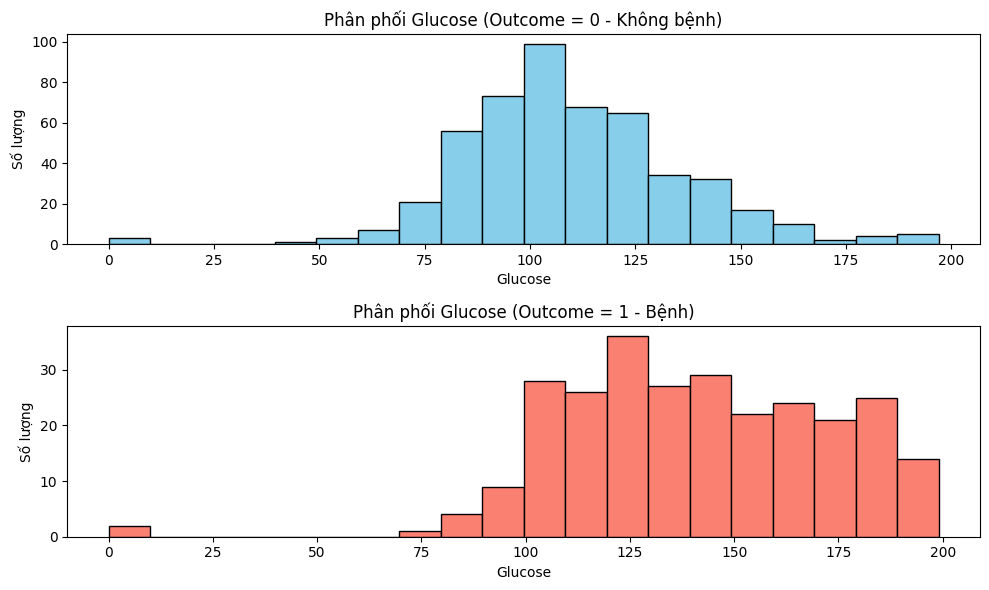

In [ ]:
plot_hist_by_outcome(df, "Glucose")

**Nhận xét**:
- Như ta đã biết Glucose có mức tương quan mạnh nhất ảnh hưởng đến việc một người có bị tiểu đường hay không. Nên không quá bất ngờ việc những người mắc bệnh tiểu đường có mức Glucose cao hơn vào khoảng 120-180 trong khi những người không mắc bệnh tiểu đường có mức Glucose bình thường vào khoảng 90-0.

-------------------Outcome vs Pregnancies-------------------



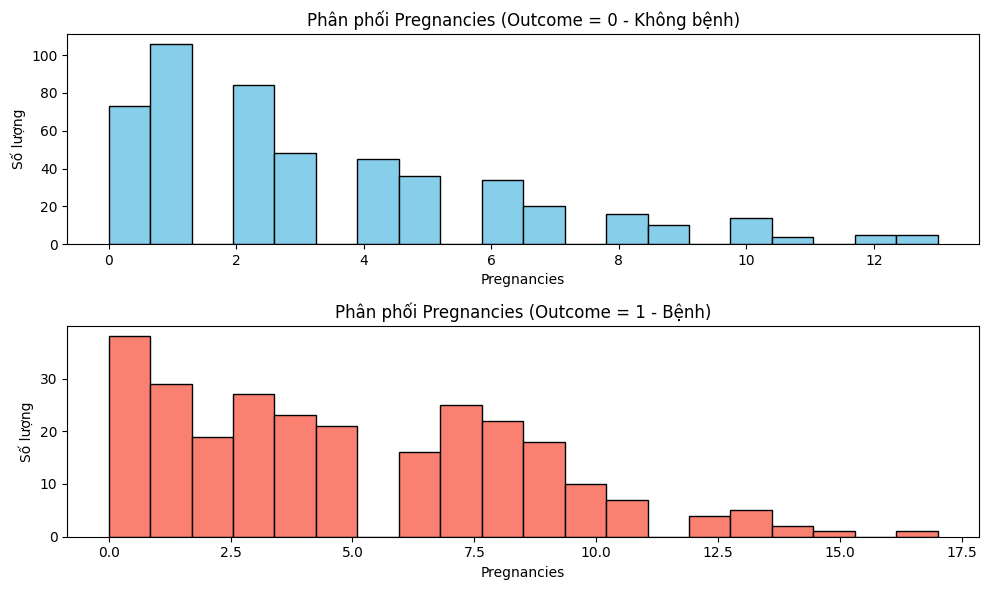

In [ ]:
plot_hist_by_outcome(df,"Pregnancies")

**Nhận xét**:
- Outcome = 0 (không tiểu đường):
    + Phần lớn tập trung ở 0–3 lần mang thai.
    + Số phụ nữ có trên 6 lần mang thai vẫn có nhưng rất ít.
    + Phân phối lệch phải (nhiều giá trị thấp, ít giá trị cao).
- Outcome = 1 (tiểu đường)
    + Phân phối dịch chuyển nhẹ về phía nhiều lần mang thai hơn.
    + Tỷ lệ phụ nữ có ≥ 6 lần mang thai cao hơn so với nhóm không bệnh.
    + Cũng có nhiều trường hợp ít mang thai nhưng vẫn mắc bệnh, cho thấy đây không phải yếu tố quyết định duy nhất.


-------------------Outcome vs SkinThickness-------------------



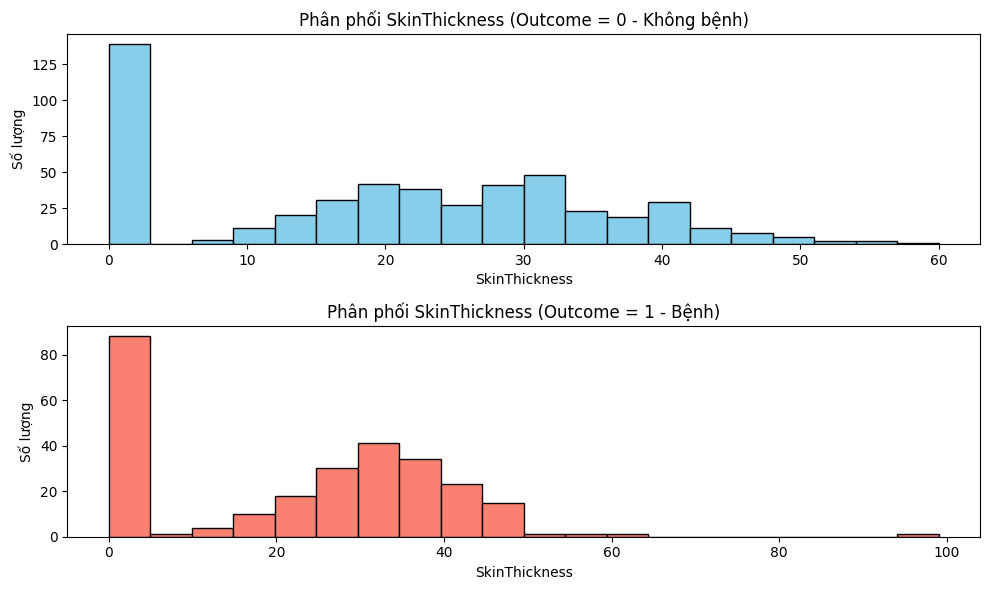

In [ ]:
plot_hist_by_outcome(df, "SkinThickness")

**Nhận xét**:
- Outcome = 0 (không tiểu đường):
    + Rất nhiều giá trị SkinThickness = 0 xuất hiện → đây là các missing values bị mã hóa.
    + Ở các giá trị khác, phân phối tập trung chủ yếu quanh 20 mm – 30 mm.
    + Phân phối nhìn chung khá rộng, nhưng bị méo mạnh do số lượng lớn giá trị 0.
- Outcome = 1 (tiểu đường)
    + Tương tự nhóm không bệnh, cũng có nhiều giá trị = 0 bất hợp lý.
    + Phân phối có xu hướng dịch sang cao hơn một chút (25 – 40 mm) nhưng không rõ rệt.
    + Nhóm mắc bệnh cũng vẫn tồn tại nhiều giá trị bằng 0 → làm giảm ý nghĩa thống kê của biến này.


-------------------Outcome vs BloodPressure-------------------



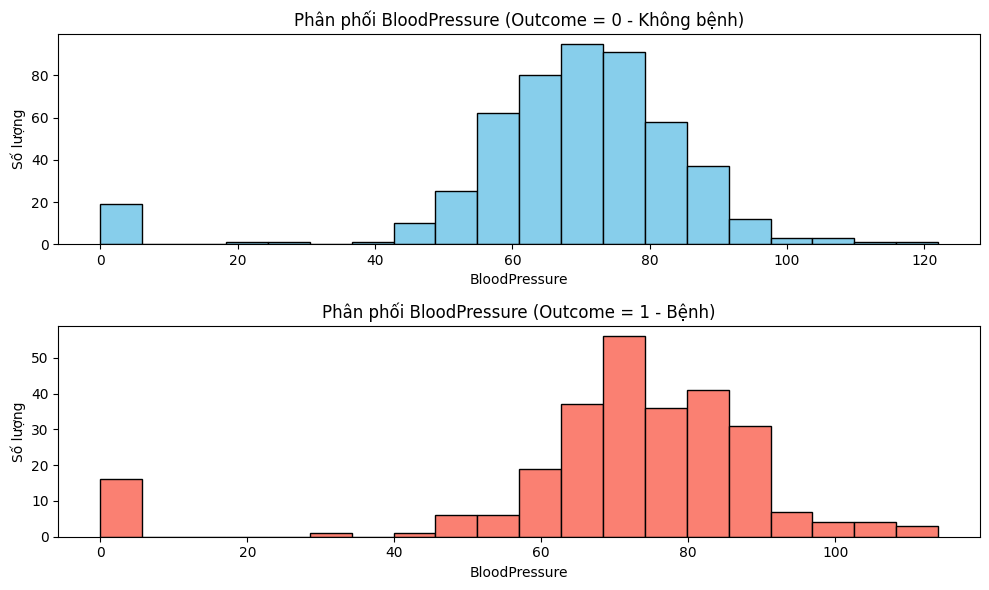

In [ ]:
plot_hist_by_outcome(df, "BloodPressure")

**Nhận xét**:
- Outcome = 0 (không tiểu đường):
    + Phân phối tập trung chủ yếu trong khoảng 60 – 80 mmHg (ngưỡng huyết áp tâm trương bình thường).
    + Phân phối khá cân đối, gần với phân phối chuẩn, nhưng có đuôi dài về phía huyết áp cao (> 90).
- Outcome = 1 (tiểu đường)
    + Phân phối cũng tập trung trong khoảng 60 – 80 mmHg, tương tự nhóm không bệnh.
    + Không thấy sự khác biệt đáng kể giữa hai nhóm.



-------------------Outcome vs BMI-------------------



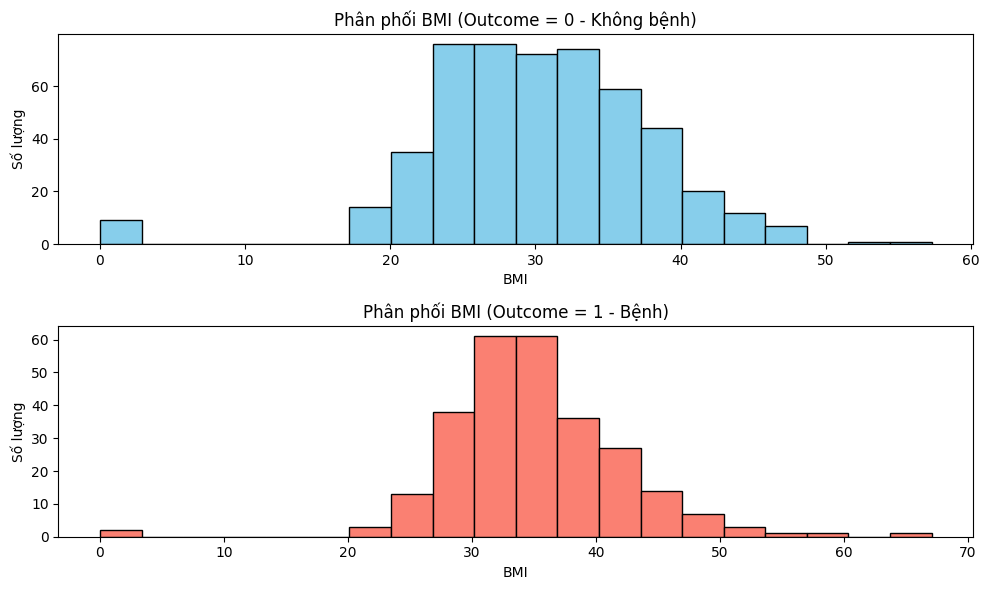

In [ ]:
plot_hist_by_outcome(df, "BMI")

**Nhận xét**:
- Outcome = 0 (không tiểu đường):
  + Phân phối tập trung quanh 25 – 32 kg/m².
  + Phân phối khá đối xứng, gần dạng chuẩn, phần lớn trong vùng BMI bình thường hoặc hơi thừa cân.
- Outcome = 1 (có tiểu đường):
  + Phân phối dịch sang cao hơn, tập trung nhiều hơn trong khoảng 30 – 40 kg/m².
  + Cho thấy bệnh nhân tiểu đường có xu hướng BMI cao hơn.

-------------------Outcome vs Insulin-------------------



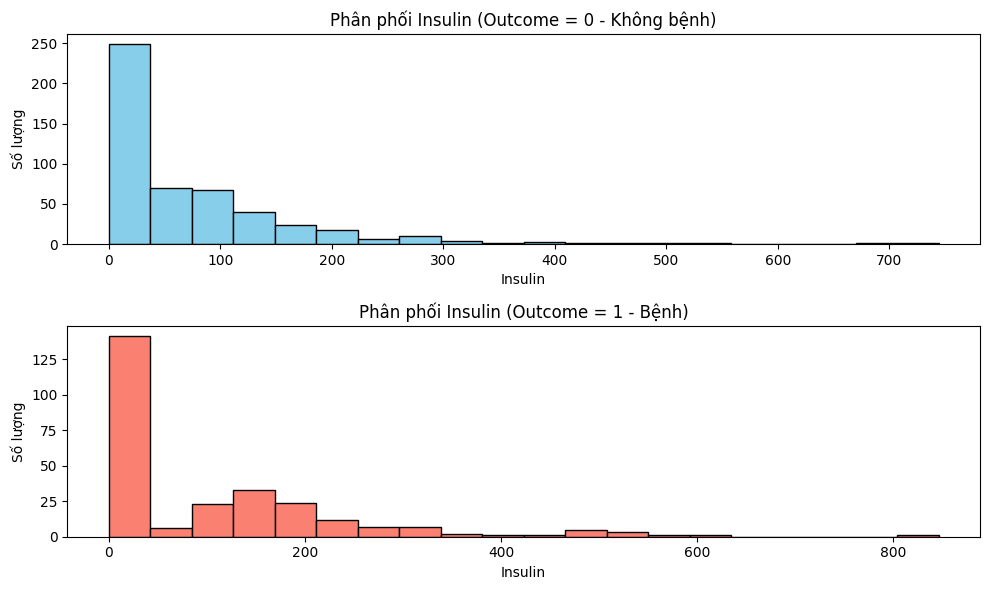

In [ ]:
plot_hist_by_outcome(df, "Insulin")

**Nhận xét**:
- Outcome = 0 (không tiểu đường)
  + Rất nhiều giá trị = 0 bất hợp lý, chiếm tỷ lệ lớn → cho thấy dữ liệu bị thiếu nhiều.
  + Ở các giá trị > 0, phân phối trải dài, chủ yếu trong khoảng 50 – 200 mu U/ml, nhưng có một số ngoại lệ rất lớn.
- Outcome = 1 (có tiểu đường)
  + Các giá trị khác phân bố rộng hơn, xuất hiện nhiều giá trị cao hơn (trên 200).
  + Đuôi phải rất dài, có outliers cực lớn.

-------------------Outcome vs DiabetesPedigreeFunction-------------------



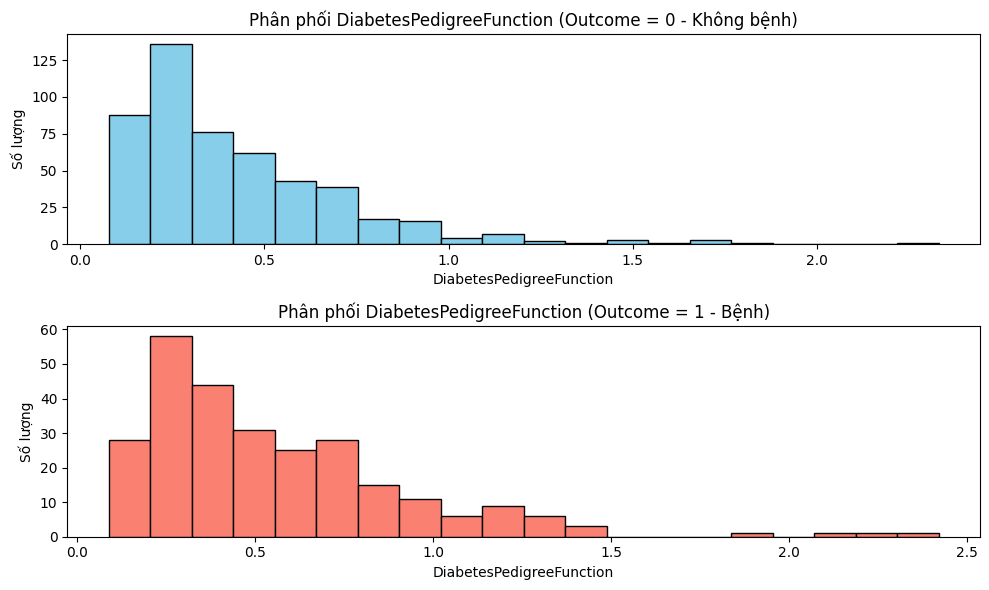

In [ ]:
plot_hist_by_outcome(df, "DiabetesPedigreeFunction")

**Nhận xét**:
- Outcome = 0 (không tiểu đường)
  + Phân phối tập trung chủ yếu ở khoảng 0.1 – 0.6.
  + Ít giá trị cao (≥ 1.0), đa phần nhỏ → cho thấy bệnh nhân không bệnh thường có yếu tố di truyền thấp.

- Outcome = 1 (có tiểu đường)
  + Phân phối trải dài hơn, xuất hiện nhiều giá trị cao hơn (≥ 1.0, thậm chí 2.4).
  + Điều này cho thấy yếu tố di truyền (tiền sử gia đình) có ảnh hưởng đến nguy cơ mắc tiểu đường.

-------------------Outcome vs Age-------------------



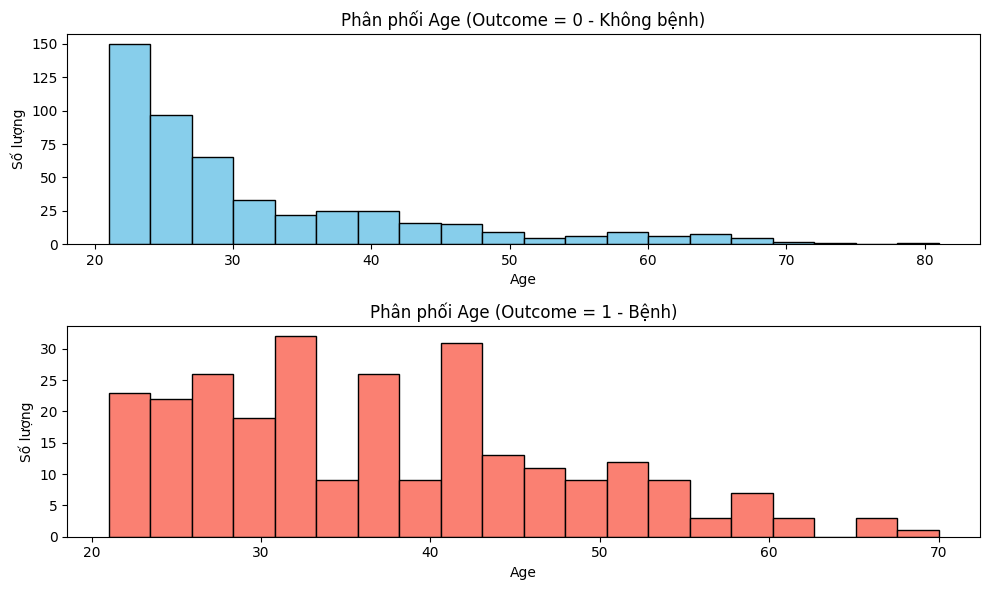

In [ ]:
plot_hist_by_outcome(df, "Age")

- Outcome = 0 (không tiểu đường)
  + Phân phối tập trung trong khoảng 21 – 40 tuổi, sau đó giảm dần.
  + Ít người trên 60 tuổi nhưng vẫn có.
- Outcome = 1 (có tiểu đường)
  + Phân phối dịch sang độ tuổi cao hơn, nhiều bệnh nhân thuộc nhóm 40 – 60 tuổi.
  + Nhóm ≥ 50 tuổi có tỷ lệ mắc bệnh rõ ràng cao hơn.

#### (3) Phân tích mối quan hệ đa biến (Multivariate Analysis – Pairplot)

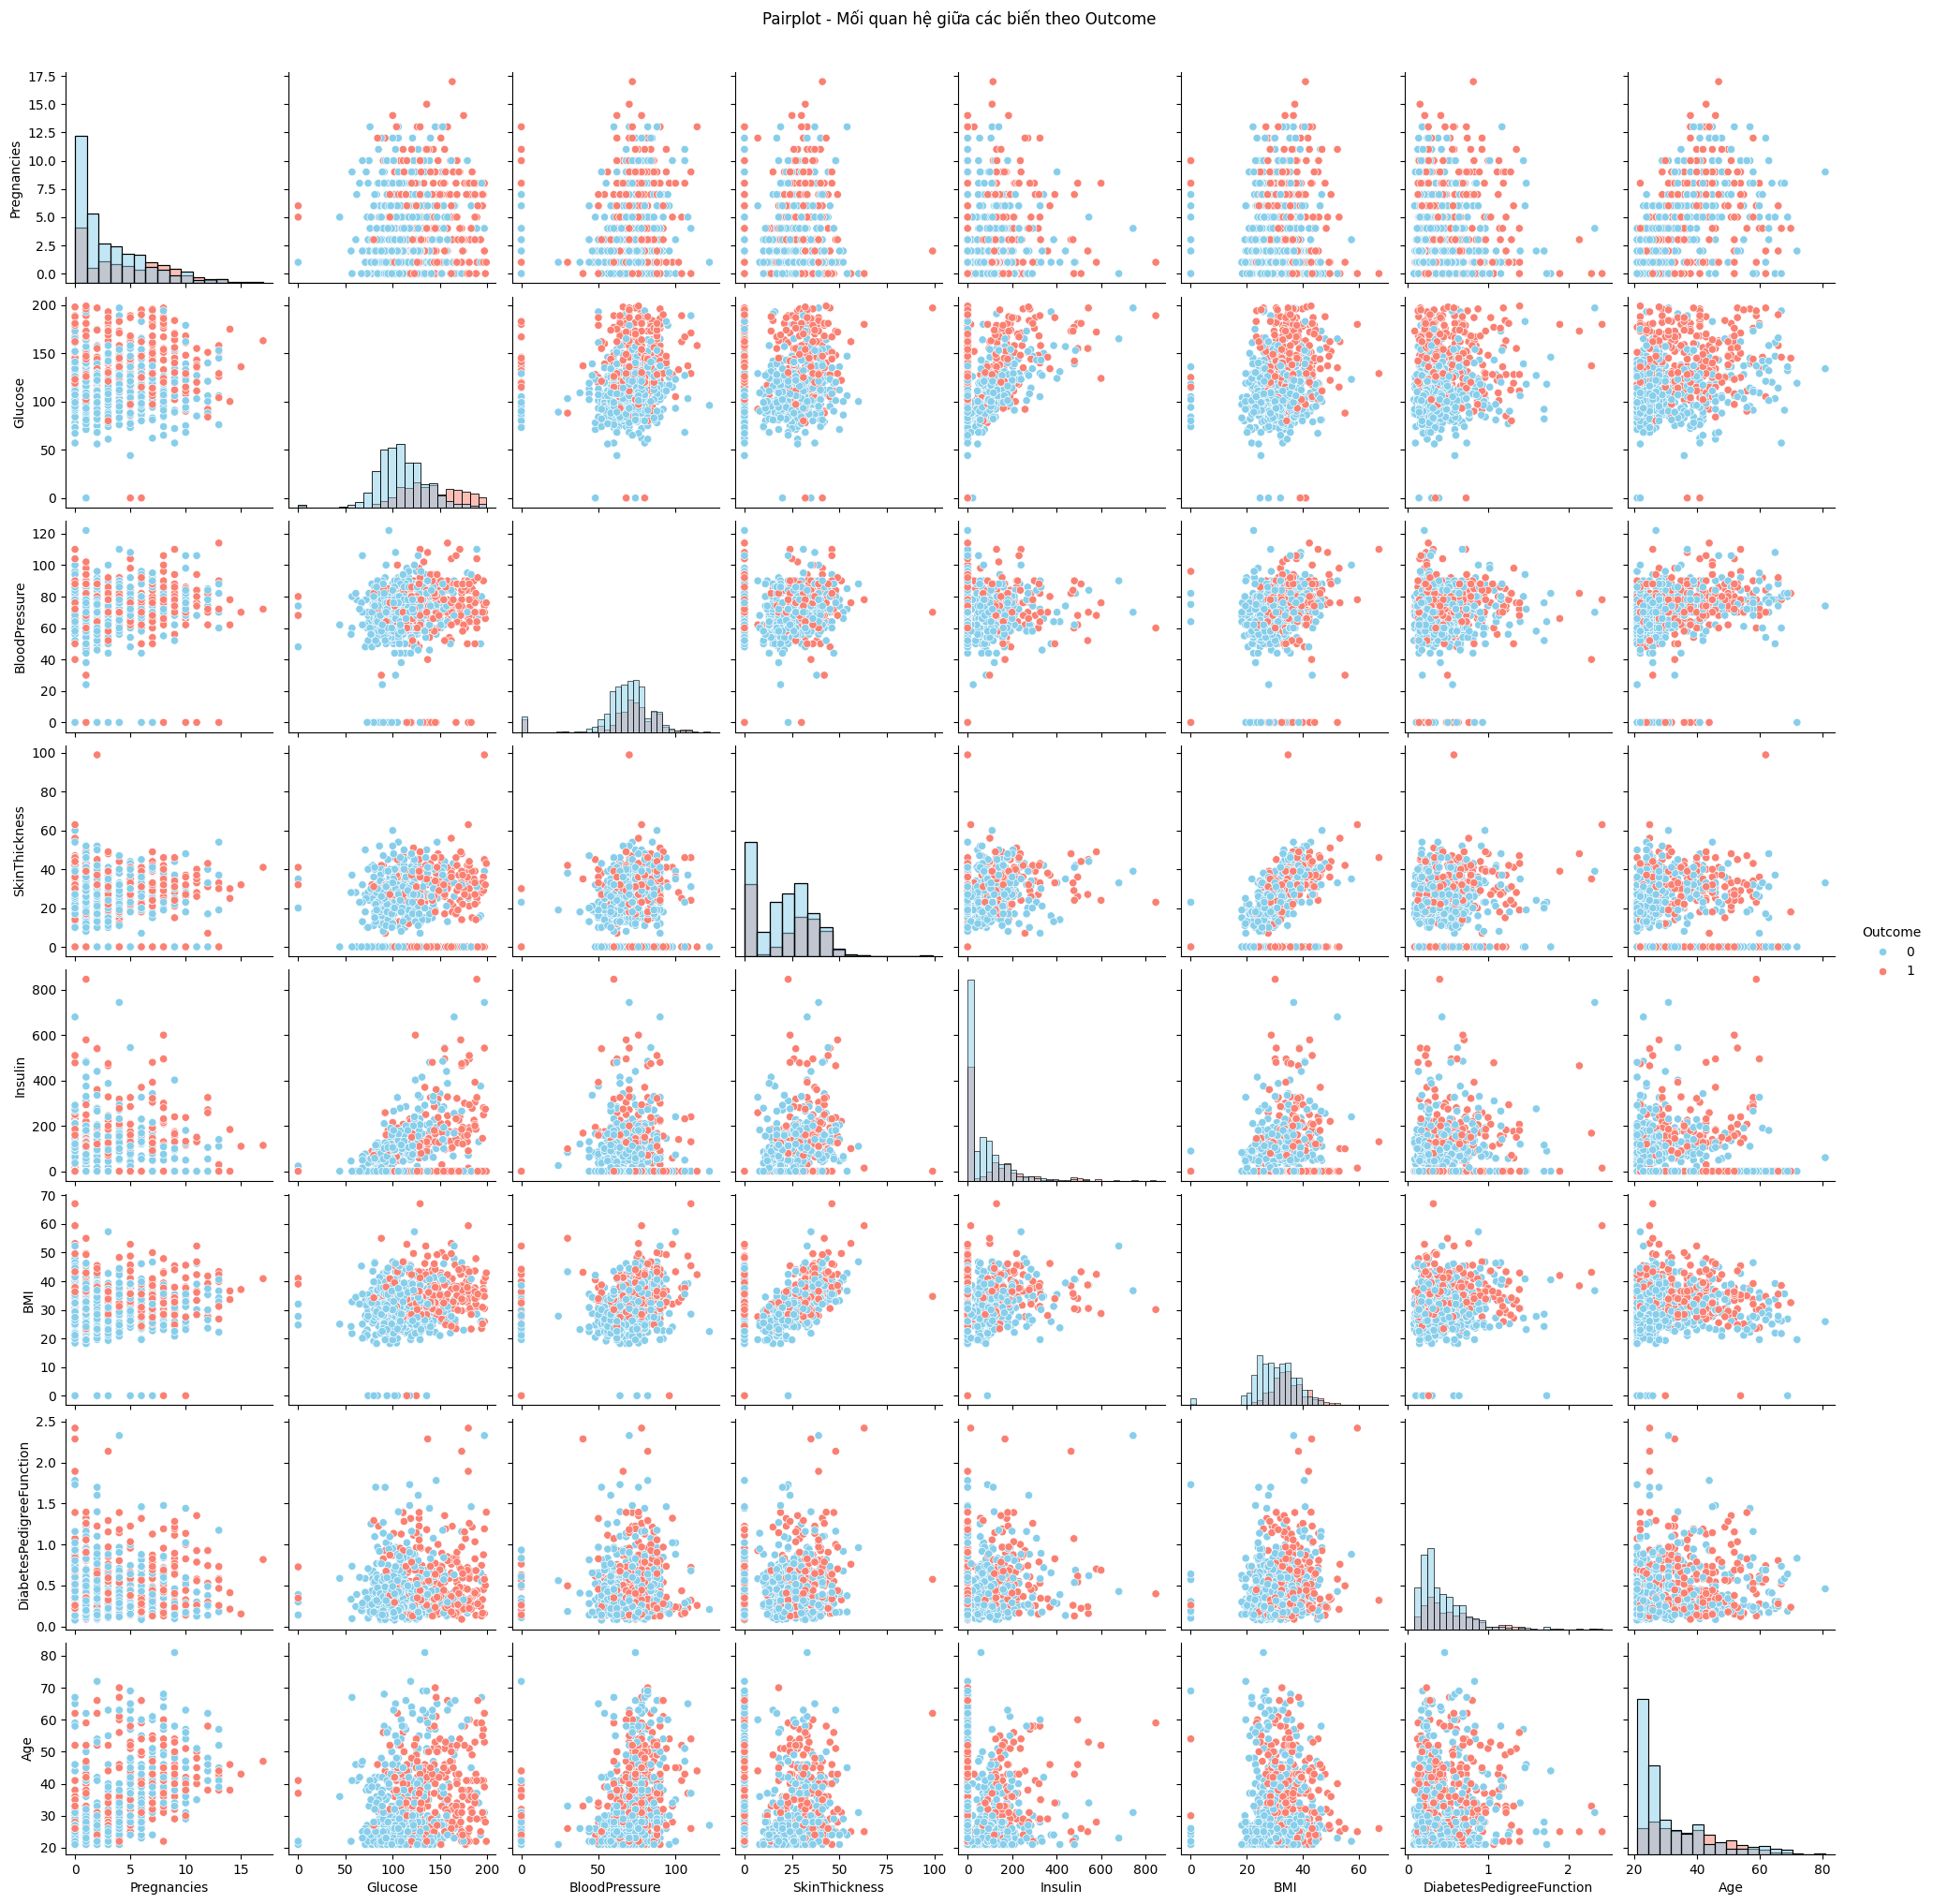

In [ ]:
# Lấy các cột numeric (loại bỏ cột phân loại nếu có)
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Pairplot với Outcome làm hue
sns.pairplot(numeric_df, hue="Outcome", diag_kind="hist", palette={0: "skyblue", 1: "salmon"})
plt.suptitle("Pairplot - Mối quan hệ giữa các biến theo Outcome", y=1.02)
plt.show()

- Glucose và BMI:
  + Hai biến này cho thấy sự phân tách khá rõ giữa hai nhóm.
  + Nhóm Outcome = 1 (bệnh) thường có Glucose và BMI cao hơn.
  + Điều này khẳng định lại kết quả từ heatmap và histogram: Glucose và BMI là hai đặc trưng quan trọng nhất để phân loại.
- Age và Pregnancies:
  + Có xu hướng cao hơn ở nhóm bệnh, nhưng sự chồng lấn vẫn nhiều.
  + Không thể phân biệt rõ rệt chỉ dựa vào hai biến này.
- BloodPressure, SkinThickness, Insulin:
  + Phân bố giữa hai nhóm gần như trùng nhau, hỗn loạn và khó tách biệt.


### 3.3 Tổng kết
- Dataset gồm 768 dòng, 9 cột, trong đó Outcome là biến mục tiêu (0 = không bệnh, 1 = bệnh).

- Dữ liệu không có trùng lặp, Null hay NaN, nhưng nhiều giá trị 0 bất hợp lý ở các cột như Glucose, BloodPressure, SkinThickness, Insulin, BMI → cần xử lý như missing values.

- Outcome mất cân bằng vừa phải: 500 (65%) không bệnh, 268 (35%) bệnh → cần lưu ý khi train mô hình.

- Thống kê mô tả cho thấy Glucose, BMI và Age có giá trị cao hơn ở nhóm bệnh, trong khi Insulin và SkinThickness chứa nhiều giá trị 0 gây nhiễu.

- Heatmap tương quan khẳng định: Glucose (0.47), BMI (0.29), Age (0.24) và Pregnancies (0.22) là các biến liên quan mạnh nhất đến Outcome.

- Histogram theo Outcome cho thấy sự phân biệt rõ ở Glucose và BMI, còn BloodPressure, SkinThickness và Insulin ít giá trị phân loại.

- Pairplot làm rõ rằng cặp Glucose–BMI phân tách tốt hai nhóm, trong khi các biến khác chồng lấn nhiều.

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [ ]:
df_clean = df.copy()

#### (2) **Xử lý giá trị rỗng, không hợp lệ**

- Các giá trị 0 bất hợp lý trong những cột trên được coi là missing values.
- Thay thế bằng NaN, sau đó dùng median để điền giá trị.

In [ ]:
# Cột có giá trị 0 bất hợp lý
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Thay thế 0 bằng NaN
df_clean[cols_with_zeros] = df_clean[cols_with_zeros].replace(0, np.nan)

# Kiểm tra số lượng NaN
print(df_clean.isnull().sum())
print()
# Điền NaN bằng median của từng cột
for col in cols_with_zeros:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)
    print(f"{col}: NaN đã được thay thế bằng median = {median_value}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose: NaN đã được thay thế bằng median = 117.0
BloodPressure: NaN đã được thay thế bằng median = 72.0
SkinThickness: NaN đã được thay thế bằng median = 29.0
Insulin: NaN đã được thay thế bằng median = 125.0
BMI: NaN đã được thay thế bằng median = 32.3


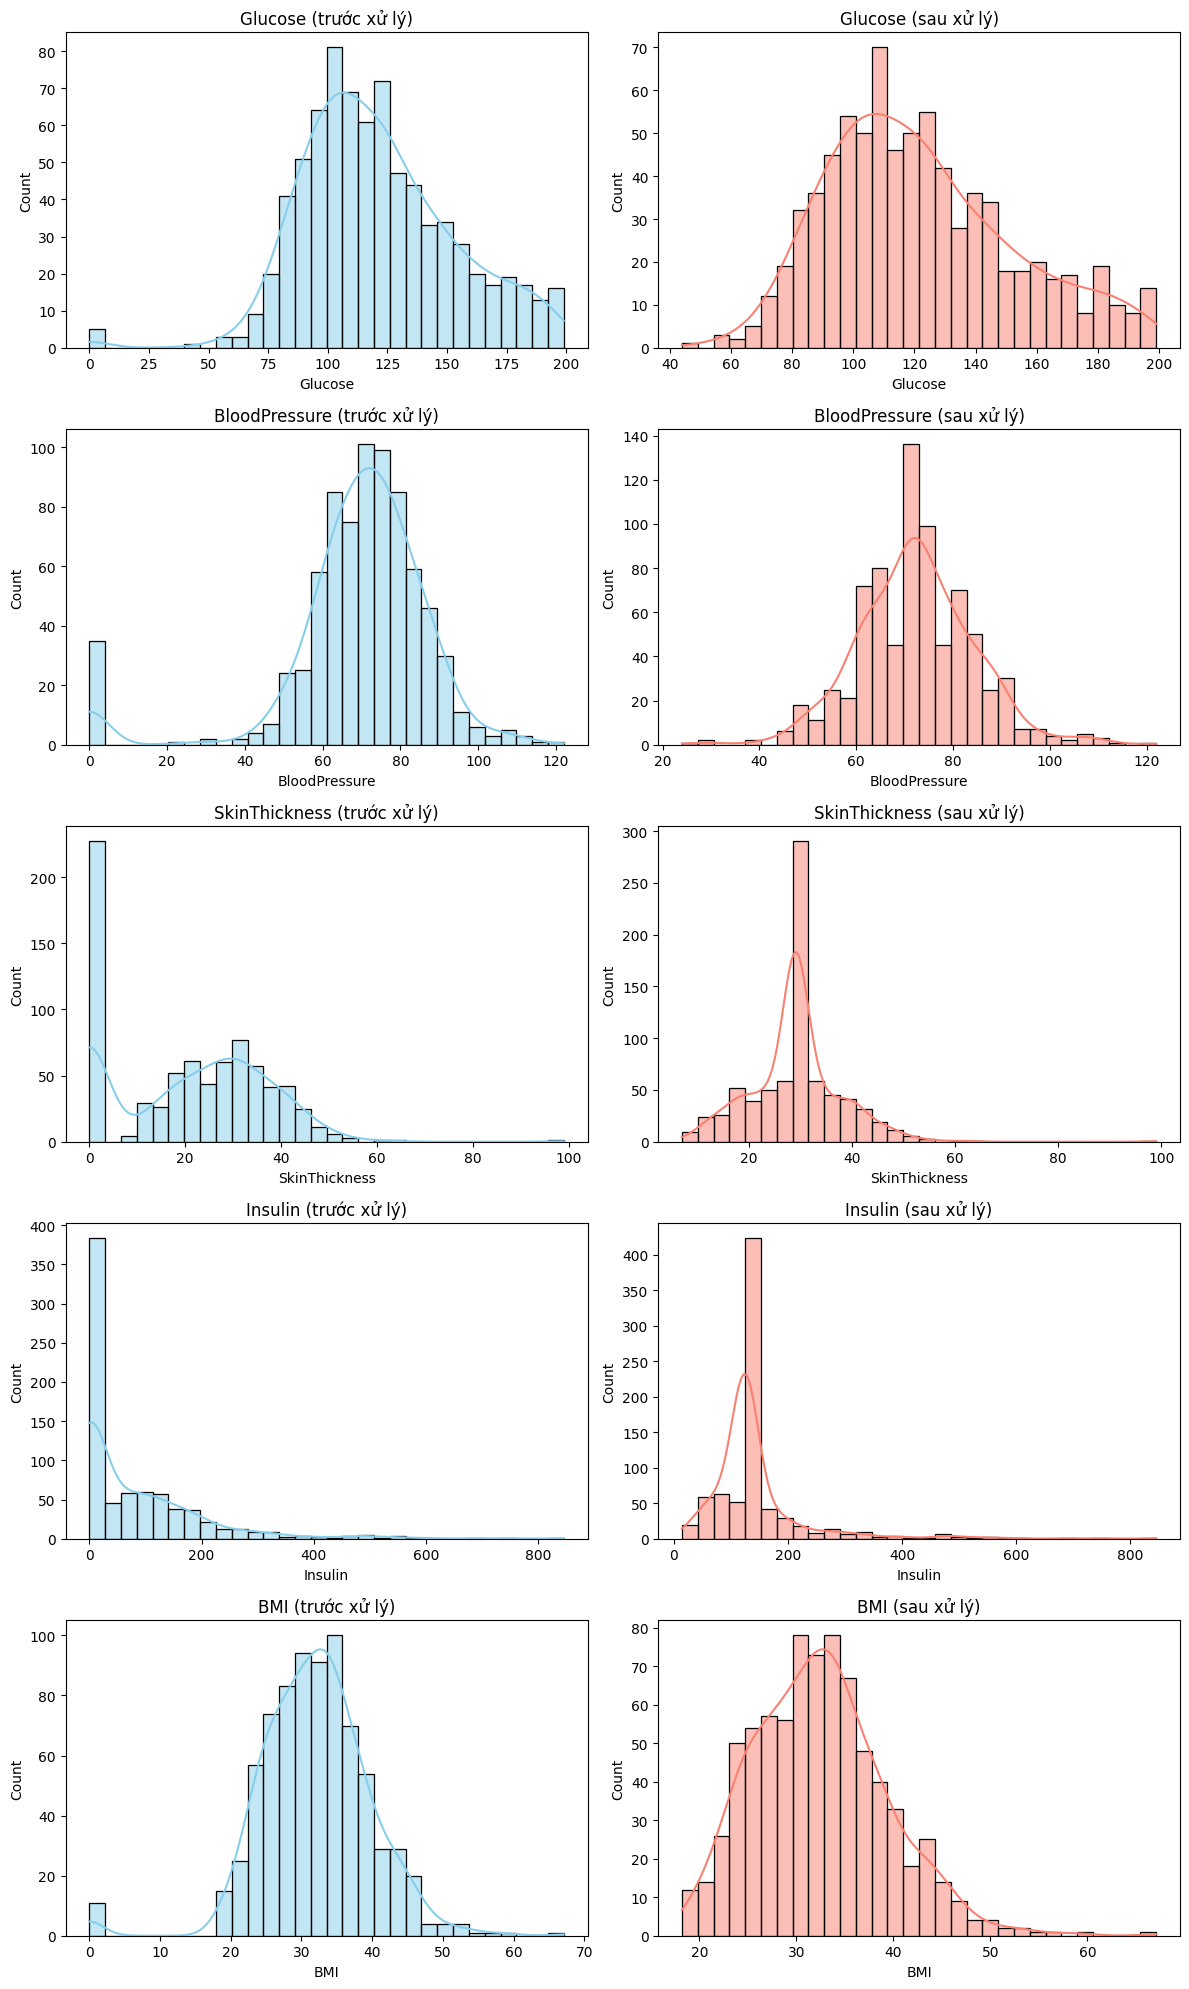

In [ ]:
# Sao chép dữ liệu gốc để so sánh
df_before = df.copy()

features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

fig, axes = plt.subplots(len(features), 2, figsize=(12, 20))  # 5 hàng, 2 cột

for i, col in enumerate(features):
    # Trước xử lý
    sns.histplot(df_before[col], bins=30, kde=True, color="skyblue", ax=axes[i,0])
    axes[i,0].set_title(f"{col} (trước xử lý)")

    # Sau xử lý
    sns.histplot(df_clean[col], bins=30, kde=True, color="salmon", ax=axes[i,1])
    axes[i,1].set_title(f"{col} (sau xử lý)")

plt.tight_layout()
plt.show()

**Nhận xét**:
  - Glucose, BloodPressure, BMI: phân phối trở nên hợp lý hơn, không còn giá trị 0 bất hợp lý.
  - SkinThickness, Insulin: giảm hẳn số lượng giá trị 0, phân phối mượt hơn, tuy vẫn có outliers nhưng không ảnh hưởng nhiều nhờ điền median.
  - Nhìn chung, sau khi làm sạch, dataset trở nên ổn định và đáng tin cậy hơn cho bước huấn luyện mô hình.

### 4.2 Khám phá dữ liệu sơ bộ & trả lời câu hỏi đặt ra

#### Câu hỏi 1: Glucose ảnh hưởng thế nào đến khả năng mắc tiểu đường?

,Glucose_bin,Outcome
0,<=100,0.086124
1,101-125,0.282443
2,126-150,0.452229
3,>150,0.750000


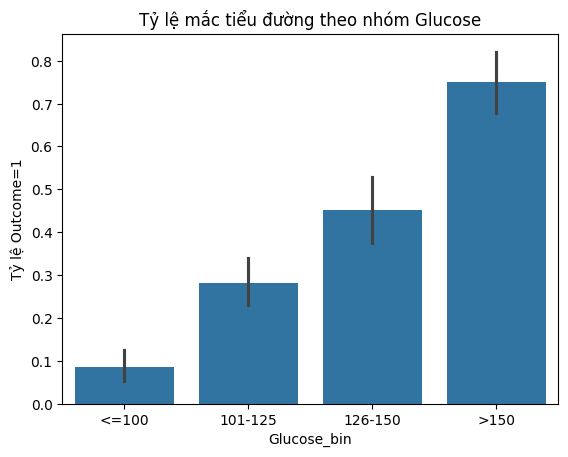

In [ ]:
# Nhóm Glucose thành bins
df_clean["Glucose_bin"] = pd.cut(df_clean["Glucose"], bins=[0, 100, 125, 150, 200],
                                 labels=["<=100", "101-125", "126-150", ">150"])

# Tính tỷ lệ mắc bệnh trong mỗi nhóm
glucose_outcome = df_clean.groupby("Glucose_bin")["Outcome"].mean().reset_index()
display(glucose_outcome)

# Barplot tỷ lệ mắc bệnh theo nhóm Glucose
sns.barplot(x="Glucose_bin", y="Outcome", data=df_clean)
plt.title("Tỷ lệ mắc tiểu đường theo nhóm Glucose")
plt.ylabel("Tỷ lệ Outcome=1")
plt.show()

**Nhận xét**:
+ Nhóm Glucose > 126 mg/dl có tỷ lệ Outcome = 1 tăng rõ rệt.
+ Đặc biệt, > 150 mg/dl thì tỷ lệ mắc bệnh vượt 50%.
+ Điều này khớp với tiêu chuẩn y khoa chẩn đoán tiểu đường (Glucose ≥ 126 mg/dl).

#### Câu hỏi 2: Nguy cơ mắc tiểu đường thay đổi ra sao theo nhóm tuổi?

,AgeGroup,Outcome
0,21-30,0.215827
1,31-40,0.484076
2,41-50,0.566372
3,51-60,0.574074
4,61+,0.259259


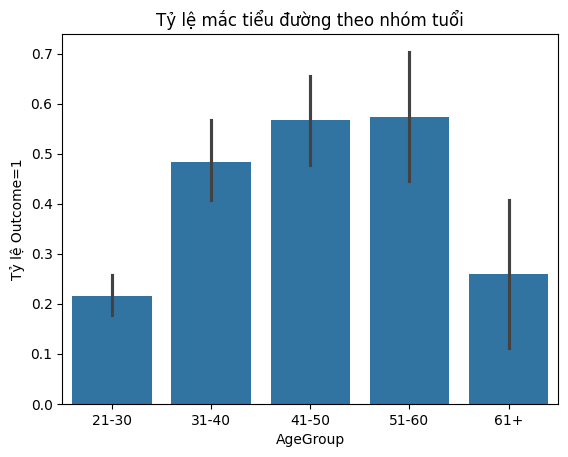

In [ ]:
df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=[20,30,40,50,60,100],
                              labels=["21-30", "31-40", "41-50", "51-60", "61+"])

age_outcome = df_clean.groupby("AgeGroup")["Outcome"].mean().reset_index()
display(age_outcome)

sns.barplot(x="AgeGroup", y="Outcome", data=df_clean)
plt.title("Tỷ lệ mắc tiểu đường theo nhóm tuổi")
plt.ylabel("Tỷ lệ Outcome=1")
plt.show()

**Nhận xét**:
  + Tỷ lệ mắc bệnh thấp ở nhóm 21–30 tuổi.
  + Bắt đầu tăng rõ ở 41–50 tuổi.
  + Nhóm 51+ tuổi có nguy cơ cao nhất (>50%).

#### Câu hỏi 3: BMI có liên quan đến Outcome thế nào?

,BMI_group,Outcome
0,Gầy,0.000000
1,Bình thường,0.064815
2,Thừa cân,0.244444
3,Béo phì,0.455882


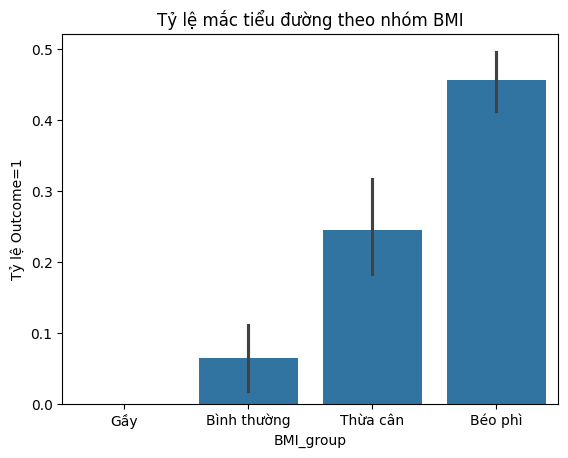

In [ ]:
df_clean["BMI_group"] = pd.cut(df_clean["BMI"], bins=[0,18.5,25,30,100],
                               labels=["Gầy", "Bình thường", "Thừa cân", "Béo phì"])

bmi_outcome = df_clean.groupby("BMI_group")["Outcome"].mean().reset_index()
display(bmi_outcome)

sns.barplot(x="BMI_group", y="Outcome", data=df_clean)
plt.title("Tỷ lệ mắc tiểu đường theo nhóm BMI")
plt.ylabel("Tỷ lệ Outcome=1")
plt.show()

**Nhận xét**:
  - Người béo phì (BMI ≥ 30) có nguy cơ mắc tiểu đường cao gấp ~2–3 lần so với người BMI < 25.
  - BMI cao là một trong những yếu tố quan trọng nhất liên quan đến Outcome.

#### Câu hỏi 4: Số lần mang thai (Pregnancies) liên hệ thế nào với tiểu đường?

,Pregnancies_group,Outcome
0,0-2,0.201681
1,3-5,0.355000
2,6-10,0.491892
3,10+,0.588235


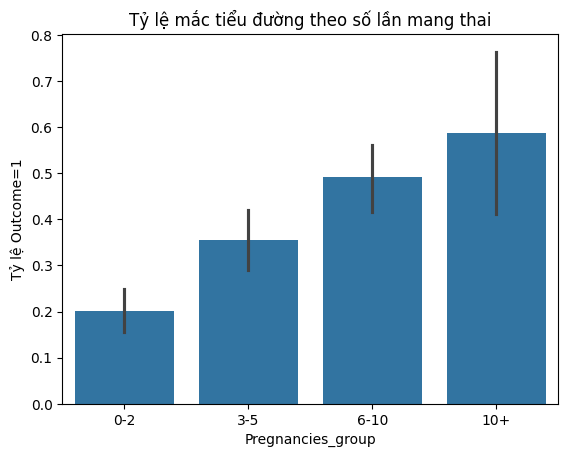

In [ ]:
df_clean["Pregnancies_group"] = pd.cut(df_clean["Pregnancies"], bins=[0,2,5,10,20],
                                       labels=["0-2", "3-5", "6-10", "10+"])

preg_outcome = df_clean.groupby("Pregnancies_group")["Outcome"].mean().reset_index()
display(preg_outcome)

sns.barplot(x="Pregnancies_group", y="Outcome", data=df_clean)
plt.title("Tỷ lệ mắc tiểu đường theo số lần mang thai")
plt.ylabel("Tỷ lệ Outcome=1")
plt.show()


**Nhận xét**:
- Phụ nữ có ≥6 lần mang thai có tỷ lệ mắc bệnh cao hơn hẳn.
- Tuy nhiên, vẫn có nhiều người ít mang thai nhưng mắc bệnh → đây không phải yếu tố quyết định duy nhất.

### 4.3. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuẩn hóa dữ liệu (Data Normalize)


In [62]:
# Xóa các cột AgeGroup và OneHot liên quan đến Age
age_cols = ["AgeGroup","Age_21-30","Age_31-40","Age_41-50","Age_51-60","Age_61+"]
df_clean = df_clean.drop(columns=[c for c in age_cols if c in df_clean.columns], errors='ignore')

numeric_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
                "BMI","DiabetesPedigreeFunction","Age"]

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_clean_minmax = df_clean.copy()
df_clean_minmax[numeric_cols] = minmax_scaler.fit_transform(df_clean[numeric_cols])
df_clean_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333,1


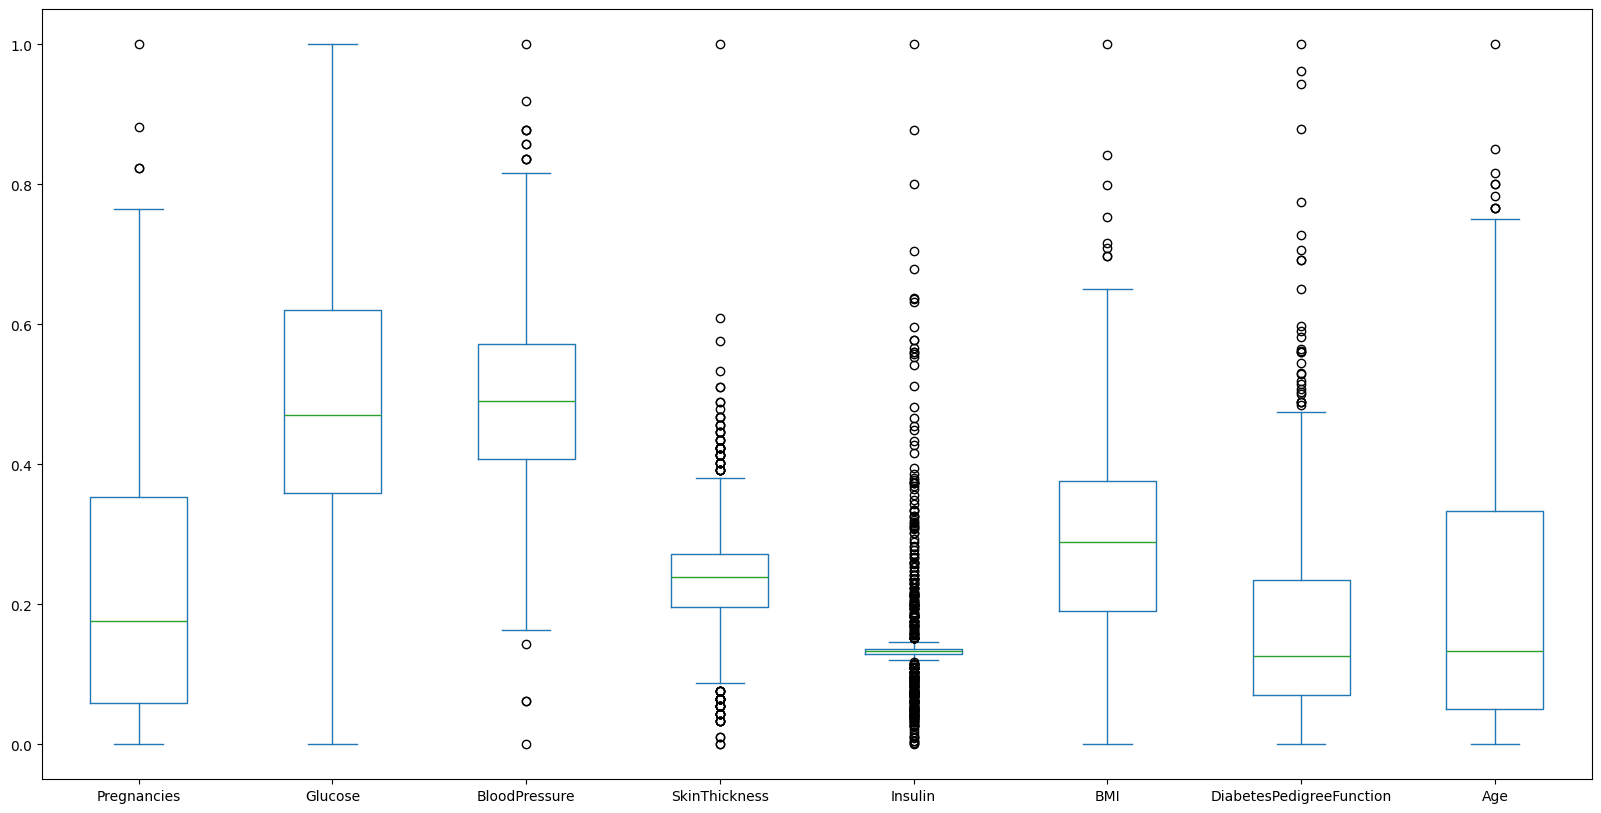

In [66]:
df_clean_minmax[numeric_cols].plot(kind="box", figsize=(20,10));

In [68]:
# Standard Normalization

standard_scaler = StandardScaler()
df_clean_standard = df_clean.copy()
df_clean_standard[numeric_cols] = standard_scaler.fit_transform(df_clean[numeric_cols])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,1


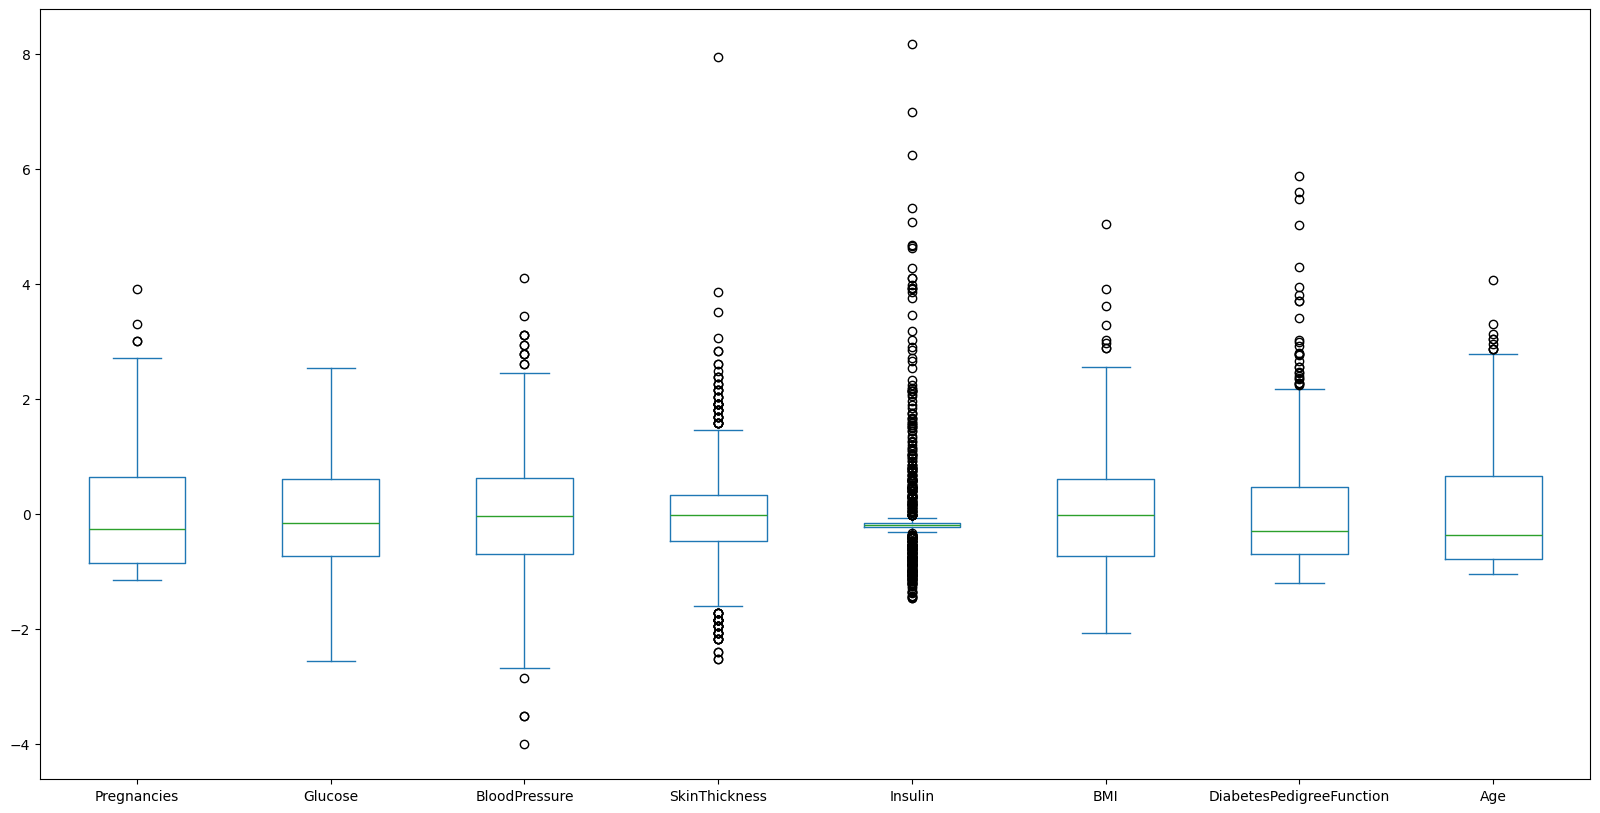

In [70]:
df_clean_standard[numeric_cols].plot(kind="box", figsize=(20, 10));

In [71]:
correlations = df_clean_standard.corr(method='pearson')
display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


#### (2) Chia dữ liệu thực nghiệm

In [78]:
### Tách biến dự đoán (predictors) và biến mục tiêu (target)
X = df_clean.drop(["Outcome"], axis=1)
y = df_clean["Outcome"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))
display(X[:20])
display(y[:20])

Size of x (predictors):	(768, 8)
Size of y (target):	(768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54


,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [82]:
# Chuyển X_train/X_test sang DataFrame để in rõ ràng
X_train_df = pd.DataFrame(X_train, columns=df_clean.columns[:-1])
X_test_df = pd.DataFrame(X_test, columns=df_clean.columns[:-1])

# In train
print(f'+ Train shape: {X_train_df.shape}')
display(X_train_df.head())
print('Output sample:', y_train[:5])

# In test
print(f'+ Test shape: {X_test_df.shape}')
display(X_test_df.head())
print('Output sample:', y_test[:5])


+ Train shape: (537, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,109.0,62.0,41.0,129.0,35.8,0.514,25.0
1,1.0,97.0,70.0,40.0,125.0,38.1,0.218,30.0
2,8.0,100.0,74.0,40.0,215.0,39.4,0.661,43.0
3,0.0,99.0,72.0,29.0,125.0,25.0,0.253,22.0
4,1.0,130.0,70.0,13.0,105.0,25.9,0.472,22.0


Output sample: [1. 0. 1. 0. 0.]
+ Test shape: (231, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,131.0,66.0,40.0,125.0,34.3,0.196,22.0
1,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
2,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0
3,1.0,93.0,56.0,11.0,125.0,22.5,0.417,22.0
4,6.0,114.0,88.0,29.0,125.0,27.8,0.247,66.0


Output sample: [1. 0. 0. 0. 0.]


In [85]:
# Lưu dữ liệu và chuẩn bị chạy thuật toán
save_dir = "exps/pima"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Lưu train/test
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Lưu df_clean (sau tất cả preprocessing)
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# Kiểm tra các file đã lưu
print(os.listdir(save_dir))

['df_clean.xlsx', 'data.npz']


In [88]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [91]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


# KẾT THÚC